In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yaml
import os

In [2]:

start_date = '2023.09.22'
end_date = '2023.09.22'
df = None
for date in pd.date_range(start_date, end_date):
    date = date.strftime('%Y.%m.%d')
    filepath = f'/home/wangzirui/workspace/data/fac_ret_{date}.pkl'
    if os.path.exists(filepath):
        print(filepath)
        tmp_df = pd.read_pickle(filepath)
        df = pd.concat([df, tmp_df], axis=0)

/home/wangzirui/workspace/data/fac_ret_2023.09.22.pkl


In [5]:
pred_type='1m'

base_dir = r'/home/wangzirui/workspace/factor_ic_summary/factor_comb_top_n/bid_ask_price'
factor_filepath = os.path.join(base_dir, f'satisfied_factors_{pred_type}.yml')
with open(factor_filepath, 'r') as f:
    factor_names = yaml.load(f, Loader=yaml.FullLoader)

sel_cols = df.columns[:5].to_list() + factor_names
df = df[sel_cols]
df.head(1)

,tradetime,securityid,1m,3m,5m,ret_v_prod_5min,ret_v_prod_1min,td_ret_v_prod_5min,td_p_v_ratio_3s_5min,td_sell_rank,...,en_b_sumprice_tsrank,ct_b_med_tsrank,can_en_v_ratio,can_en_v_ratio_fillna,can_en_pv_ratio,can_en_pv_ratio_fillna,best_v_imbalance_tsrank,bs_press,OB_price_spread_tsrank,en_v_order_inbalance
0,2023-09-22 09:30:00,000002.SZ,-0.003008,-0.006015,-0.006015,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.827729,NaN,1.0


In [6]:
cols = df.columns[5:]
corr_df = df[cols].corr()

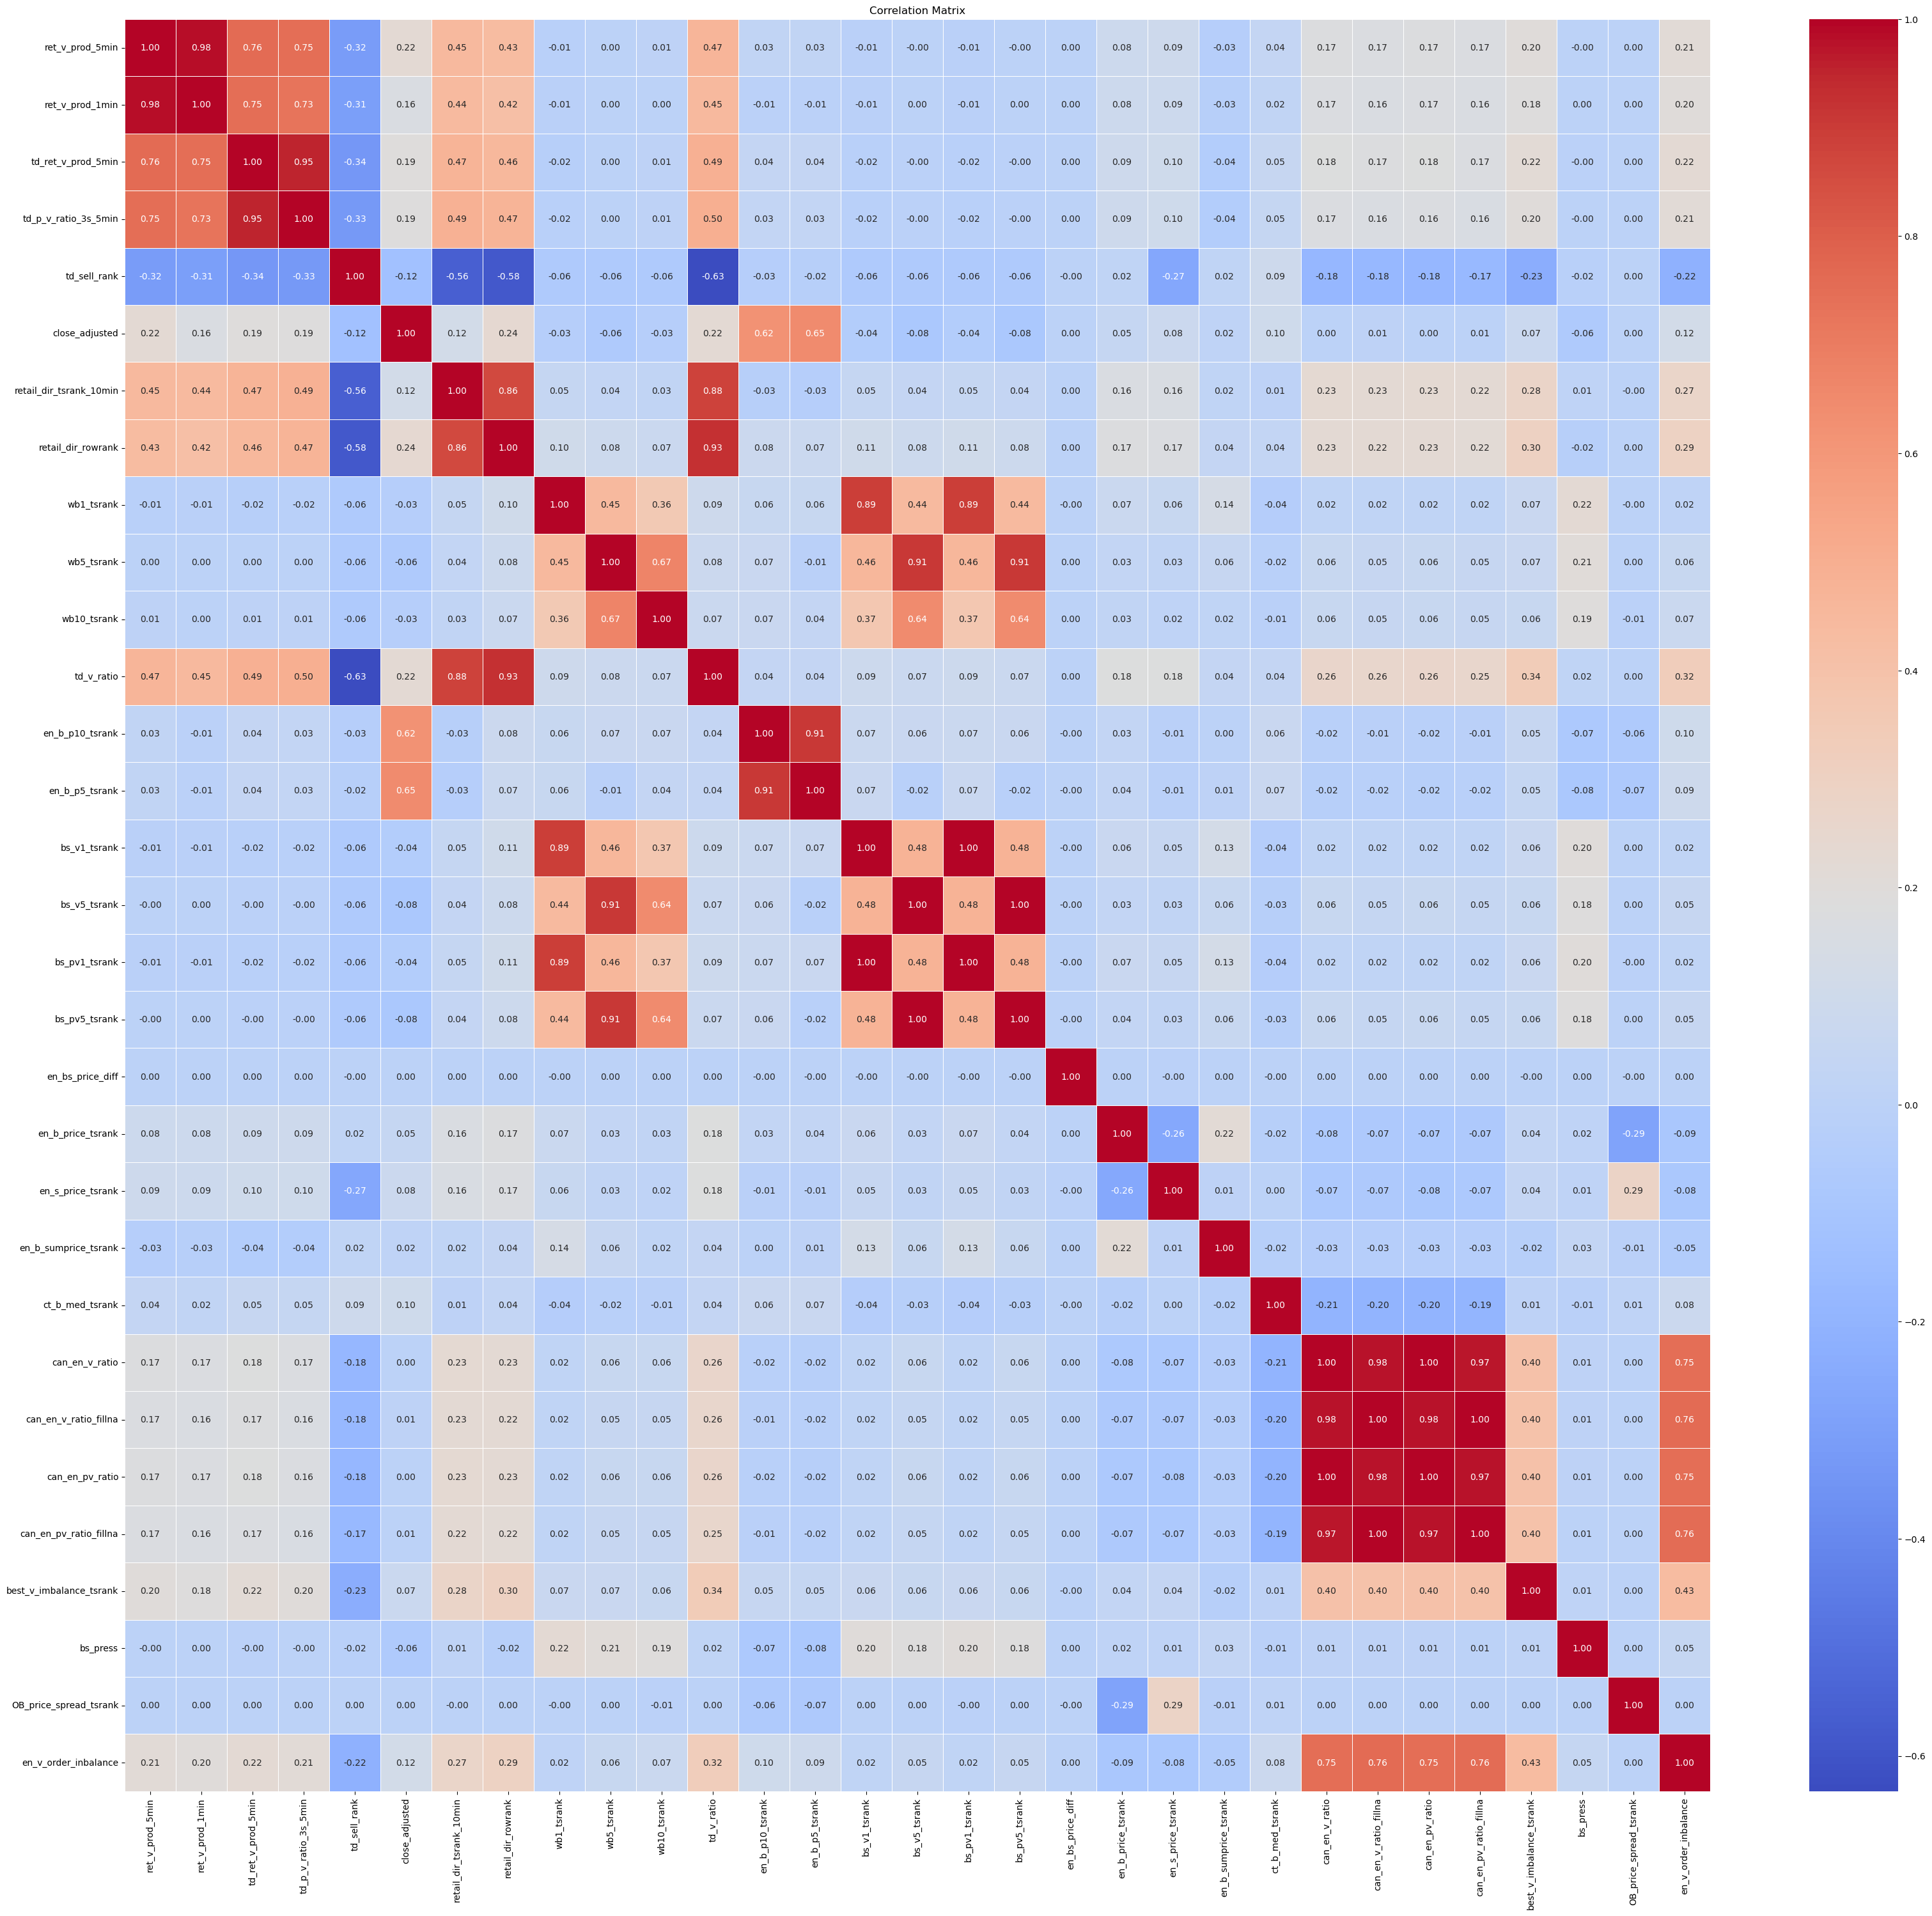

In [8]:
plt.figure(figsize=(40, 36))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [12]:
pred_type='1m'
base_dir = r'/home/wangzirui/workspace/factor_ic_summary/factor_comb_top_n/bid_ask_price'
factor_filepath = os.path.join(base_dir, f'satisfied_factors_{pred_type}_without_hcorr.yml')
with open(factor_filepath, 'r') as f:
    factor_names = yaml.load(f, Loader=yaml.FullLoader)

sel_cols = df.columns[:5].to_list() + factor_names
no_hcorr_df = df[sel_cols]
no_hcorr_df.head(1)

cols = no_hcorr_df.columns[5:]
corr_df = no_hcorr_df[cols].corr()

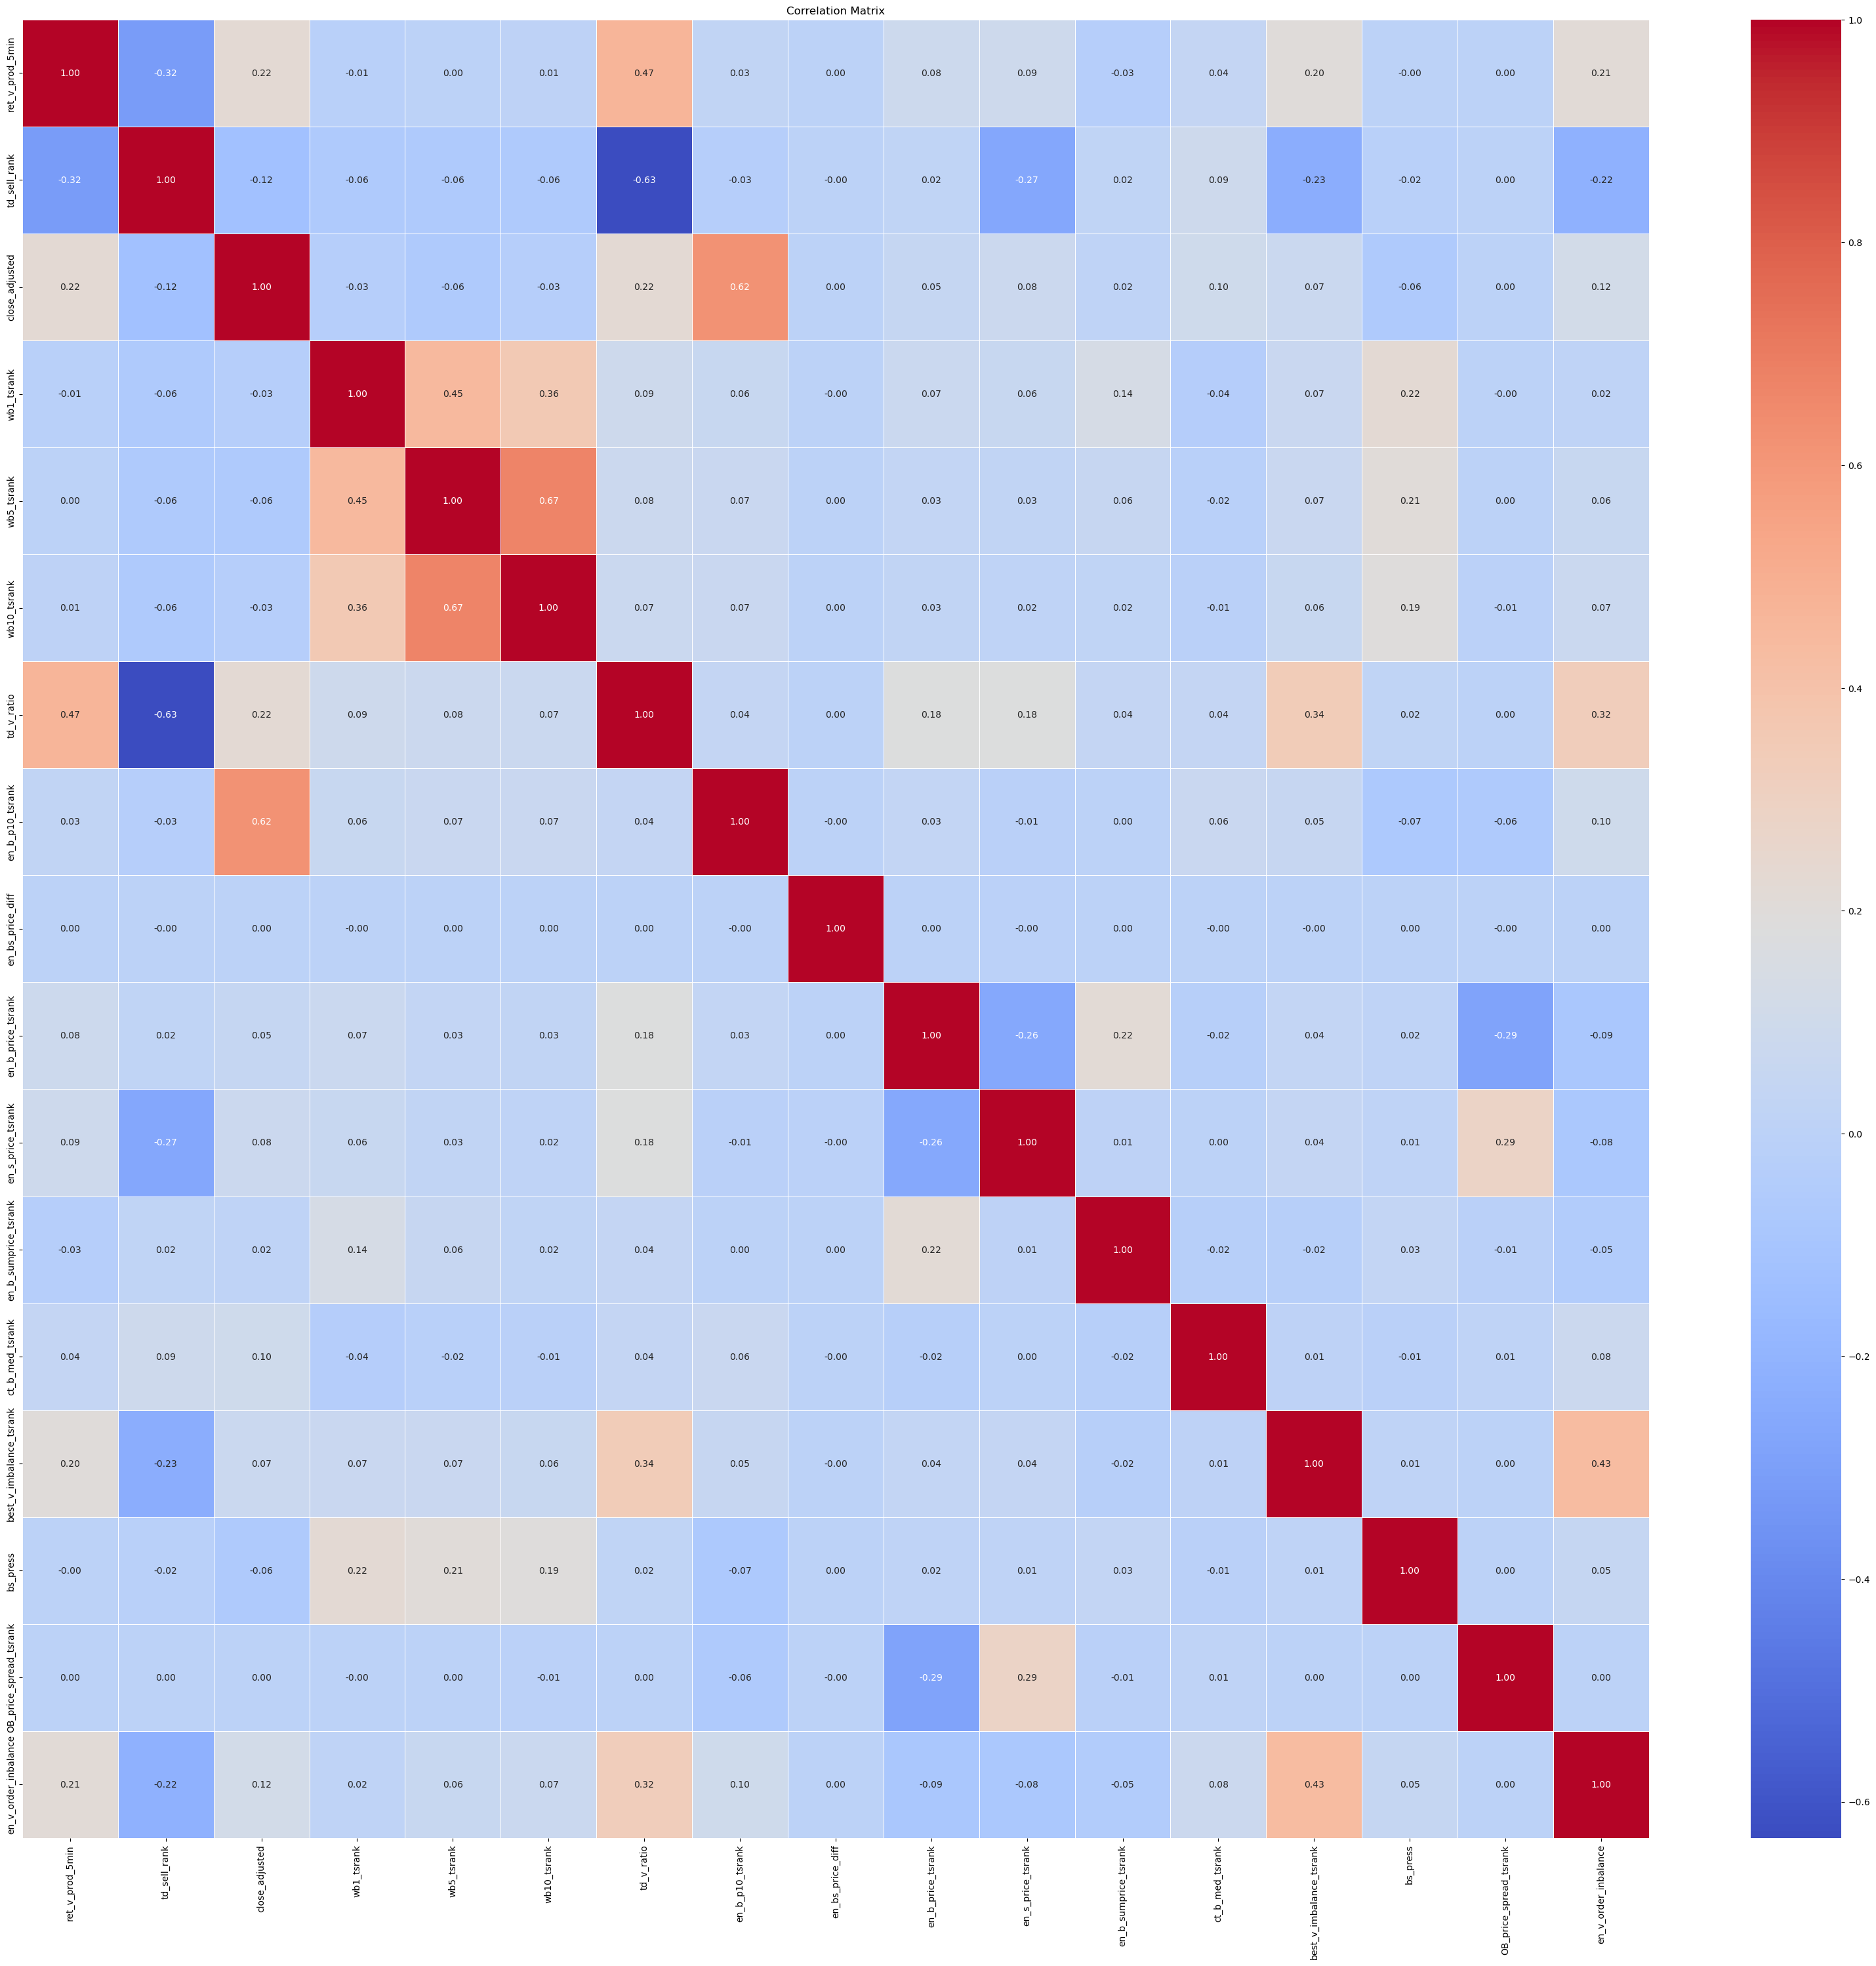

In [13]:
plt.figure(figsize=(40, 36))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()